In [58]:
from xgboost import XGBRegressor as XGBR
from sklearn import ensemble, linear_model, datasets, model_selection, metrics
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from time import time
import datetime

In [2]:
# 加载波斯顿房价数据
data = datasets.load_boston()

In [3]:
data

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [4]:
X = data.data
y = data.target

In [5]:
X.shape

(506, 13)

In [6]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [7]:
# 划分训练集和测试机
Xtrain,Xtest,Ytrain,Ytest = model_selection.train_test_split(X,y,test_size=0.3,random_state=66)

In [8]:
reg = XGBR(n_estimators=100).fit(Xtrain, Ytrain)

[15:14:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [9]:
reg.predict(Xtest)

array([12.592747 , 46.811787 , 26.924074 , 48.16439  , 20.760406 ,
       20.119137 , 20.353926 , 19.846237 , 43.350857 , 17.550903 ,
       22.225645 , 10.690709 , 33.356182 , 24.126766 , 15.140952 ,
       20.538557 , 14.875004 , 16.278269 ,  6.26308  , 15.136764 ,
       22.77923  , 19.187895 , 22.433964 , 44.176353 , 17.473566 ,
       26.433046 , 19.359375 , 19.864746 , 15.881857 , 32.270615 ,
       23.30797  , 30.909895 , 43.971203 , 16.069332 , 24.52954  ,
       22.661636 , 25.176636 , 24.645456 , 18.486576 , 19.332338 ,
       24.650244 , 21.276299 , 18.105803 , 48.592205 , 34.48     ,
       17.035051 , 25.938656 , 11.859091 , 21.333435 , 21.269943 ,
       31.303091 , 16.216557 , 46.206993 , 25.025608 , 12.7671385,
       18.924807 , 25.192522 , 19.236532 , 20.470718 , 20.659159 ,
       19.365356 , 18.790375 ,  9.924239 , 20.703978 , 21.04323  ,
       20.538229 , 19.711664 , 21.914103 , 22.55355  , 20.196505 ,
        9.272021 , 21.170135 , 22.224846 , 15.714669 , 22.1558

In [10]:
reg.score(Xtest, Ytest)

0.9095195362893523

In [12]:
y.mean()

22.532806324110677

In [13]:
metrics.mean_squared_error(Ytest, reg.predict(Xtest))

7.475233642181661

In [14]:
# 查看特征的重要性
reg.feature_importances_

array([0.02545103, 0.00404931, 0.00712936, 0.00984662, 0.05593726,
       0.20111786, 0.01414236, 0.04193303, 0.01778238, 0.01710316,
       0.0548932 , 0.01235592, 0.53825843], dtype=float32)

In [36]:
# 使用交叉验证训练测试集
reg1 = XGBR(n_estimators=100, objective='reg:squarederror')
# 默认返回的是R^2,返回k折R^2数组
model_selection.cross_val_score(reg1, Xtrain, Ytrain, cv=5)

array([0.76079437, 0.87680757, 0.87553645, 0.79116733, 0.87739451])

In [37]:
model_selection.cross_val_score(reg1, Xtrain, Ytrain, cv=5).mean()

0.8363400441983639

In [38]:
model_selection.cross_val_score(reg1, Xtrain, Ytrain, scoring='neg_mean_squared_error',cv=5).mean()

-13.367685874806963

In [19]:
import sklearn
# 查看sklearn所有的评估指标
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

In [23]:
# 使用随机森林和线性回归做一个对比
rfr = ensemble.RandomForestRegressor(n_estimators=100)
model_selection.cross_val_score(rfr, Xtrain,Ytrain, scoring='neg_mean_squared_error', cv=5).mean()

-12.950360698269616

In [26]:
lr = linear_model.LinearRegression()
model_selection.cross_val_score(lr, Xtrain,Ytrain, scoring='neg_mean_squared_error',cv=5).mean()

-28.198076216288655

In [35]:
# 开启后台打印模式
reg2 = XGBR(n_estimators=5, silent=False, objective='reg:squarederror')
# 默认返回的是R^2,返回k折R^2数组
model_selection.cross_val_score(reg2, Xtrain, Ytrain, cv=5)

array([-1.5926313 , -1.60511938, -1.66967639, -1.92057598, -1.37744984])

In [39]:
def plot_learning_curve(estimator,title, X, y, 
                        ax=None, #选择子图
                        ylim=None, #设置纵坐标的取值范围
                        cv=None, #交叉验证
                        n_jobs=None #设定索要使用的线程
                       ):
    
    from sklearn.model_selection import learning_curve
    import matplotlib.pyplot as plt
    import numpy as np
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y
                                                            ,shuffle=True
                                                            ,cv=cv
                                                            ,random_state=420
                                                            ,n_jobs=n_jobs)      
    if ax == None:
        ax = plt.gca()
    else:
        ax = plt.figure()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")
    ax.grid() #绘制网格，不是必须
    ax.plot(train_sizes, np.mean(train_scores, axis=1), 'o-'
            , color="r",label="Training score")
    ax.plot(train_sizes, np.mean(test_scores, axis=1), 'o-'
            , color="g",label="Test score")
    ax.legend(loc="best")
    return ax

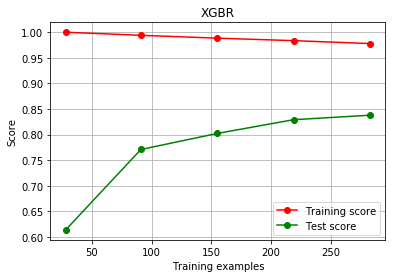

In [50]:
cv = model_selection.KFold(n_splits=5, random_state=66, shuffle=True)
plot_learning_curve(XGBR(n_estimators=100, objective='reg:squarederror', random_state=66), 'XGBR', Xtrain, Ytrain, cv=cv)
plt.show()


0.8395758406525438 160


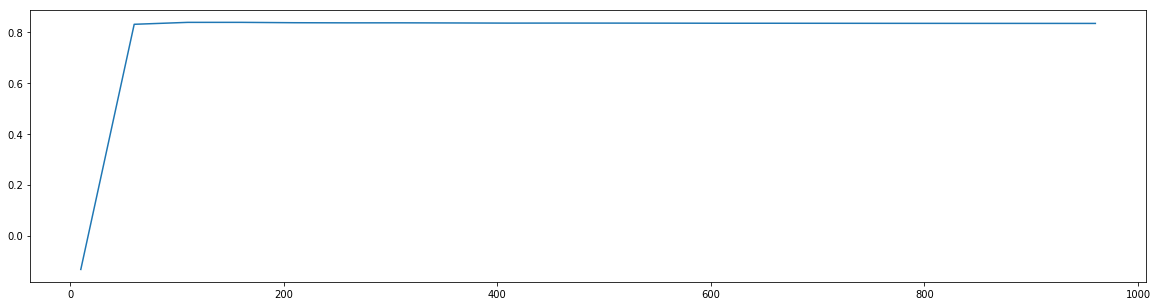

CPU times: user 13 s, sys: 37.1 ms, total: 13 s
Wall time: 12.9 s


In [60]:
%%time
# 绘画学习曲线 寻找最佳的n_estimators
cv = model_selection.KFold(n_splits=5, random_state=66, shuffle=True)
axisx = range(10, 1010, 50)
mean_scores = []
for i in axisx:
    reg = XGBR(n_estimators=i, objective='reg:squarederror', random_state=66)
    mean_score = model_selection.cross_val_score(reg, Xtrain,Ytrain, cv=cv).mean()
    mean_scores.append(mean_score)
print(max(mean_scores), axisx[mean_scores.index(max(mean_scores))])
plt.figure(figsize=(20,5))
plt.plot(axisx, mean_scores, label='XGB')
plt.show()

150 0.8392922900001787 0.006099207337471731
50 0.8292963195698354 0.003921231860320798
150 0.8392922900001787 0.006099207337471731 0.30168765928372765


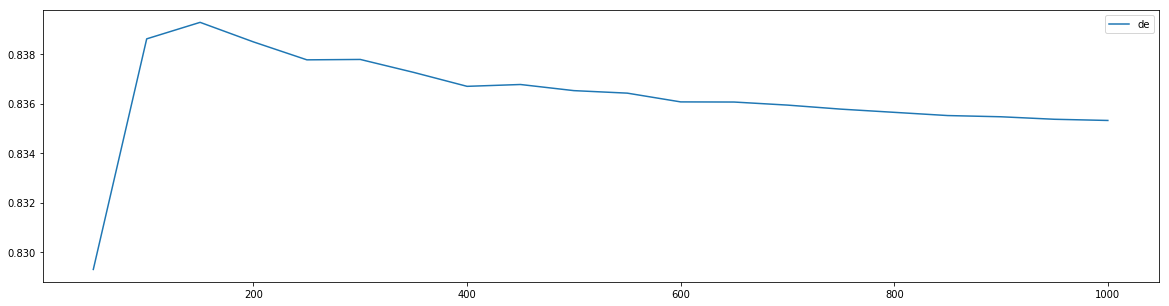

In [70]:
# 结合偏差和方差探索泛化误差
# 泛化误差 = 偏差^2 + 方差 + 噪声
# 初始化偏差,方差,泛化误差
de = []
var = []
ge=[]
axisx = range(50, 1050, 50)
cv = model_selection.KFold(n_splits=5, random_state=66, shuffle=True)
for i in axisx:
    reg = XGBR(n_estimators=i, objective='reg:squarederror', random_state=66)
    cvresult = model_selection.cross_val_score(reg, Xtrain,Ytrain, cv=cv)
    # cross_val_score 默认返回的是R^2, 1-R^2就是偏差
    de.append(cvresult.mean())
    # 记录方差
    var.append(cvresult.var())
    # 计算泛化误差
    ge.append((1 - cvresult.mean()**2) + cvresult.var())
# 打印R^2最大时(偏差最小) n_estimators和var 对应的取值
print(axisx[de.index(max(de))], max(de), var[de.index(max(de))])
# 再次打印方差最小时 n_estimators和R^2的对应取值
print(axisx[var.index(min(var))], de[var.index(min(var))], min(var))
# 再次打印泛化误差最小时对应的偏差和方差
print(axisx[ge.index(min(ge))], de[ge.index(min(ge))], var[ge.index(min(ge))], min(ge))

plt.figure(figsize=(20, 5))
plt.plot(axisx, de, label='de')
# plt.plot(axisx, var, 'g-o', label='var')
# plt.plot(axisx, ge, 'b-', label='ge')
plt.legend()
plt.show()

130 0.839873473446238 0.006015846892544341
100 0.8386247789838756 0.005874315557451528
120 0.8396348881707978 0.00592915725098377 0.031646126342976304


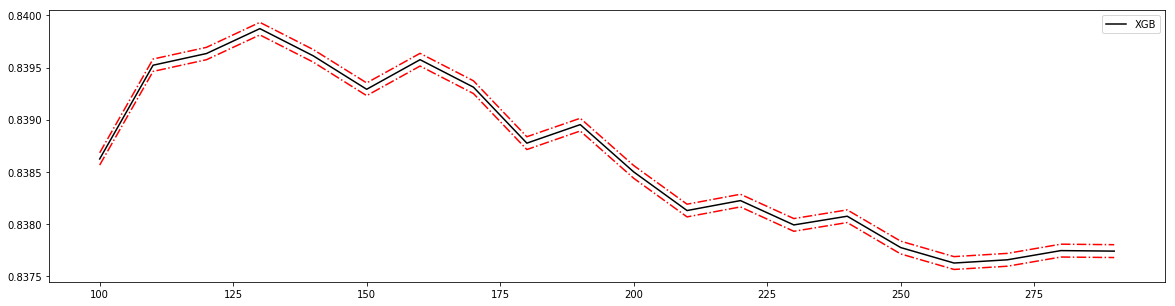

In [73]:
# 细化n_estimators学习的曲线,并查看数据的波动
# 由下面图可知 最佳的n_estimators为120
axisx = range(100,300,10)
rs = []
var = []
ge = []
for i in axisx:
    reg = XGBR(n_estimators=i, objective='reg:squarederror', random_state=66)
    cvresult = model_selection.cross_val_score(reg,Xtrain,Ytrain,cv=cv)
    rs.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2+cvresult.var())
print(axisx[rs.index(max(rs))],max(rs),var[rs.index(max(rs))])
print(axisx[var.index(min(var))],rs[var.index(min(var))],min(var))
print(axisx[ge.index(min(ge))],rs[ge.index(min(ge))],var[ge.index(min(ge))],min(ge))
rs = np.array(rs)
var = np.array(var)*0.01
plt.figure(figsize=(20,5))
plt.plot(axisx,rs,c="black",label="XGB")
#添加方差线
plt.plot(axisx,rs+var,c="red",linestyle='-.')
plt.plot(axisx,rs-var,c="red",linestyle='-.')
plt.legend()
plt.show()

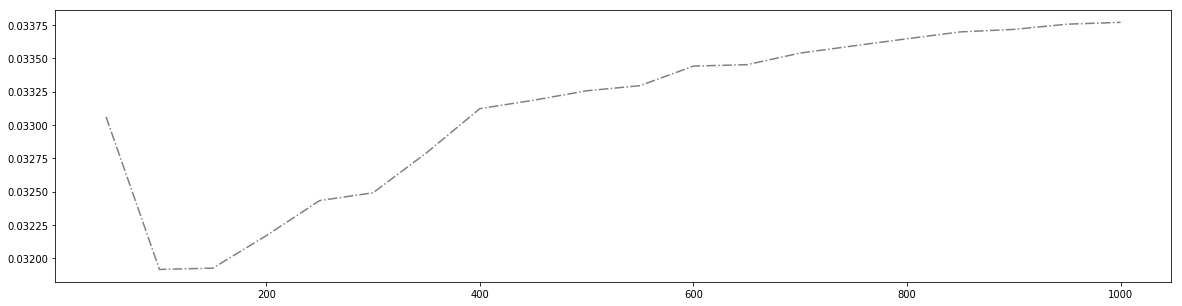

In [76]:
# 查看泛化误差
plt.figure(figsize=(20,5))
plt.plot(axisx,ge,c="gray",linestyle='-.')
plt.show()

In [83]:
# 查看模型效果
start = time()
print(XGBR(n_estimators=120, objective='reg:squarederror', random_state=66).fit(Xtrain,Ytrain).score(Xtest,Ytest))
print(time() - start)

0.9124052798985232
0.059590816497802734


0.6842105263157894 0.8588174315834973


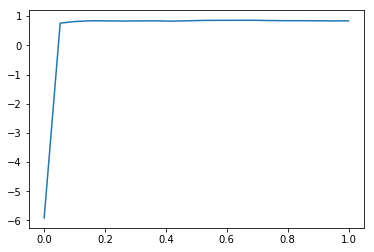

In [85]:
# subsample 抽样比例 
# 绘画subsample的学习曲线
axisx = np.linspace(0, 1, 20)
rs = []
for i in axisx:
    reg = XGBR(n_estimators=120, objective='reg:squarederror', subsample=i, random_state=66)
    rs.append(model_selection.cross_val_score(reg, Xtrain,Ytrain, cv=5).mean())

print(axisx[rs.index(max(rs))],max(rs))
plt.figure()
plt.plot(axisx, rs)
plt.show()

0.65 0.8567474826216035 0.0038830508475129768
0.15 0.8260418497392582 0.0025524761228954535
0.65 0.8567474826216035 0.0038830508475129768 0.024404334582760766


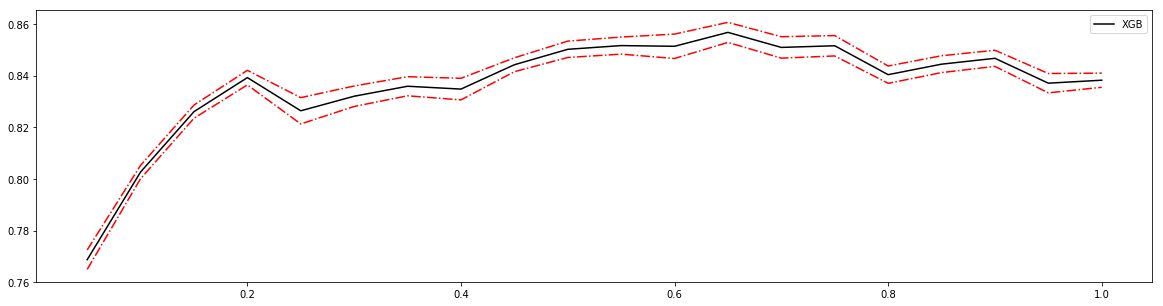

In [100]:
# 继续细化学习曲线
re = []
var = []
ge = []
axisx = np.linspace(0.05, 1, 20)
for i in axisx:
    reg = XGBR(n_estimators=120, objective='reg:squarederror', subsample=i, random_state=66)
    cvresult = model_selection.cross_val_score(reg, Xtrain,Ytrain, cv=5)
    re.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
    
print(axisx[re.index(max(re))], max(re), var[re.index(max(re))])
print(axisx[var.index(min(var))], re[var.index(min(var))], min(var))
print(axisx[ge.index(min(ge))], re[ge.index(min(ge))], var[ge.index(min(ge))], min(ge))

rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20, 5))
plt.plot(axisx, re, 'k-',label='XGB')
plt.plot(axisx, re+var, 'r-.')
plt.plot(axisx, re-var, 'r-.')
plt.legend()
plt.show()


0.6736842105263158 0.8590567943474534 0.0029894195334874106
0.6842105263157895 0.8588174315834973 0.0027819971551442503
0.6842105263157895 0.8588174315834973 0.0027819971551442503 0.022714514779824706


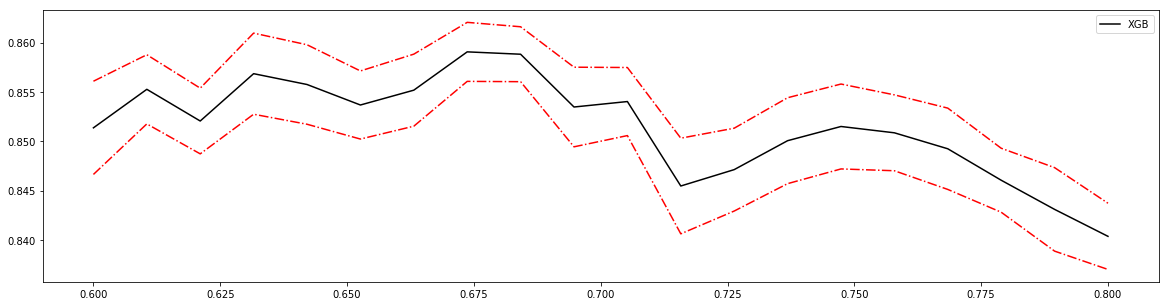

In [101]:
# 继续细化学习曲线
# 由下图可知最佳的subsample 应该在0.6842105263157895处
re = []
var = []
ge = []
axisx = np.linspace(0.6, 0.8, 20)
for i in axisx:
    reg = XGBR(n_estimators=120, objective='reg:squarederror', subsample=i, random_state=66)
    cvresult = model_selection.cross_val_score(reg, Xtrain,Ytrain, cv=5)
    re.append(cvresult.mean())
    var.append(cvresult.var())
    ge.append((1 - cvresult.mean())**2 + cvresult.var())
    
print(axisx[re.index(max(re))], max(re), var[re.index(max(re))])
print(axisx[var.index(min(var))], re[var.index(min(var))], min(var))
print(axisx[ge.index(min(ge))], re[ge.index(min(ge))], var[ge.index(min(ge))], min(ge))

rs = np.array(rs)
var = np.array(var)
plt.figure(figsize=(20, 5))
plt.plot(axisx, re, 'k-',label='XGB')
plt.plot(axisx, re+var, 'r-.')
plt.plot(axisx, re-var, 'r-.')
plt.legend()
plt.show()


In [105]:
# 结合挑选出来的最佳n_estimators和subsample 查看预测效果
reg = XGBR(n_estimators=120, 
           objective='reg:squarederror', 
#            subsample=0.6842105263157895, 
           random_state=66,
          ).fit(Xtrain,Ytrain)
reg.score(Xtest,Ytest)

0.9124052798985232

In [106]:
metrics.mean_squared_error(Ytest, reg.predict(Xtest))

7.23682186990153

In [112]:
#首先我们先来定义一个评分函数，这个评分函数能够帮助我们直接打印Xtrain上的交叉验证结果
def regassess(reg,Xtrain,Ytrain,cv,scoring = ["r2"],show=True):
    score = []
    for i in range(len(scoring)):
        if show:
            print("{}:{:.2f}".format(scoring[i] #模型评估指标的名字
                                     ,model_selection.cross_val_score(reg
                                          ,Xtrain,Ytrain
                                          ,cv=cv,scoring=scoring[i]).mean()))
        score.append(model_selection.cross_val_score(reg,Xtrain,Ytrain,cv=cv,scoring=scoring[i]).mean())
    return score

In [113]:
reg = XGBR(n_estimators=120, 
           objective='reg:squarederror', 
           random_state=66,
          ).fit(Xtrain,Ytrain)
regassess(reg, Xtrain,Ytrain, cv=5, scoring = ["r2","neg_mean_squared_error"])

r2:0.84
neg_mean_squared_error:-13.19


[0.8382211051575436, -13.187688438262644]

In [114]:
regassess(reg, Xtrain,Ytrain, cv=5, scoring = ["r2","neg_mean_squared_error"], show=False)

[0.8382211051575436, -13.187688438262644]